In [1]:
import os
os.chdir('../../')

In [2]:
import pandas as pd
import re
from google.oauth2 import service_account
from google.cloud import bigquery
%matplotlib inline

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [4]:
SERVICE_ACCOUNT = 'private/bigquery-write-access.json'
DATASET = 'student_counts'
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT)

In [5]:
bqclient = bigquery.Client(project=credentials.project_id, credentials=credentials)

## Read Data

In [6]:
query_string = \
"""
SELECT * 
FROM `int-stud-mobility-drivers.datasets_for_modelling.students_by_year_countrly_all_predictors` 
"""
dataframe = bqclient.query(query_string).result().to_dataframe()

In [7]:
country_codes = {
    "Australia": 'aus', 
    'Canada': 'can', 
    'United Kingdom': 'uk',
    'United States of America': 'us',
    'New Zealand': 'nz'
}
destination_col = 'destination_code'
dataframe[destination_col] = dataframe.destination_country.apply(lambda x: country_codes[x])

In [8]:
dataframe = dataframe[dataframe.source_country == 'China']
#dataframe = dataframe[dataframe.destination_country == 'Canada']

In [9]:
index_cols = ['source_country', 'year']
dst_cols = [col for col in dataframe.columns if col.startswith('dst')]
src_cols = [col for col in dataframe.columns if col.startswith('src')]

## Transform Destination Country Variables 

In [10]:
dest_index = index_cols + [destination_col]
dest_df = dataframe[dest_index + dst_cols].copy()
dest_df.set_index(dest_index, inplace=True)
dest_df.head()

dst_distance  dst_students_count  \
source_country year destination_code                                     
China          1998 aus                       7470                4132   
               1999 aus                       7470                4578   
               2000 aus                       7470                5008   
               2002 aus                       7470               17343   
               2003 aus                       7470               23448   

                                      dst_average_wage  dst_cost_of_living  \
source_country year destination_code                                         
China          1998 aus                            NaN                 NaN   
               1999 aus                            NaN                 NaN   
               2000 aus                        45459.0                 NaN   
               2002 aus                        46270.0                 NaN   
               2003 aus                        46811.0                 NaN   

                                      dst_rent_cost_of_living  dst_rent_index  \
source_country year destination_code                                            
China          1998 aus                                   NaN             NaN   
               1999 aus                                   NaN             NaN   
               2000 aus                                   NaN             NaN   
               2002 aus                                   NaN             NaN   
               2003 aus                                   NaN             NaN   

                                      dst_groceries_index  \
source_country year destination_code                        
China          1998 aus                               NaN   
               1999 aus                               NaN   
               2000 aus                               NaN   
               2002 aus                               NaN   
               2003 aus                               NaN   

                                      dst_purchasing_power_index  \
source_country year destination_code                               
China          1998 aus                                      NaN   
               1999 aus                                      NaN   
               2000 aus                                      NaN   
               2002 aus                                      NaN   
               2003 aus                                      NaN   

                                      dst_resraurant_price_index  \
source_country year destination_code                               
China          1998 aus                                      NaN   
               1999 aus                                      NaN   
               2000 aus                                      NaN   
               2002 aus                                      NaN   
               2003 aus                                      NaN   

                                      dst_rate_of_one_usd  dst_qoe_top20  \
source_country year destination_code                                       
China          1998 aus                          1.591828            NaN   
               1999 aus                          1.549950            NaN   
               2000 aus                          1.724827            NaN   
               2002 aus                          1.840563            NaN   
               2003 aus                          1.541914            NaN   

                                      dst_qoe_top100  dst_qoe_top200  \
source_country year destination_code                                   
China          1998 aus                          NaN             NaN   
               1999 aus                          NaN             NaN   
               2000 aus                          NaN             NaN   
               2002 aus                          NaN             NaN   
               2003 aus                          NaN     

In [11]:
dest_df = dest_df.unstack(level=destination_col)
dest_df.head()

dst_distance                                    \
destination_code             aus     can       nz      uk       us   
source_country year                                                  
China          1998       7470.0  9380.0  11160.0  7775.0  11640.0   
               1999       7470.0  9380.0  11160.0  7775.0  11640.0   
               2000       7470.0  9380.0  11160.0  7775.0  11640.0   
               2001       7470.0  9380.0  11160.0  7775.0  11640.0   
               2002       7470.0  9380.0  11160.0  7775.0  11640.0   

                    dst_students_count                                     \
destination_code                   aus      can      nz       uk       us   
source_country year                                                         
China          1998             4132.0   2820.0    78.0   2877.0  43000.0   
               1999             4578.0   3489.0   247.0   4250.0  46949.0   
               2000             5008.0   4701.0  1133.0   6158.0  50281.0   
               2001            11175.0   6972.0  3338.0  10388.0  51986.0   
               2002            17343.0  10176.0  8481.0  17483.0  63211.0   

                    dst_average_wage                                      \
destination_code                 aus      can       nz       uk       us   
source_country year                                                        
China          1998              NaN      NaN      NaN      NaN      NaN   
               1999              NaN      NaN      NaN      NaN      NaN   
               2000          45459.0  39380.0  31806.0  38908.0  53904.0   
               2001          45953.0  39218.0  32391.0  40840.0  54360.0   
               2002          46270.0  38800.0  33005.0  41517.0  54788.0   

                    dst_cost_of_living                  \
destination_code                   aus can  nz  uk  us   
source_country year                                      
China          1998                NaN NaN NaN NaN NaN   
               1999                NaN NaN NaN NaN NaN   
               2000                NaN NaN NaN NaN NaN   
               2001                NaN NaN NaN NaN NaN   
               2002                NaN NaN NaN NaN NaN   

                    dst_rent_cost_of_living                 dst_rent_index  \
destination_code                        aus can  nz  uk  us            aus   
source_country year                                                          
China          1998                     NaN NaN NaN NaN NaN            NaN   
               1999                     NaN NaN NaN NaN NaN            NaN   
               2000                     NaN NaN NaN NaN NaN            NaN   
               2001                     NaN NaN NaN NaN NaN            NaN   
               2002                     NaN NaN NaN NaN NaN            NaN   

                                    dst_groceries_index                  \
destination_code    can  nz  uk  us                 aus can  nz  uk  us   
source_country year                                                       
China          1998 NaN NaN NaN NaN                 NaN NaN NaN NaN NaN   
               1999 NaN NaN NaN NaN                 NaN NaN NaN NaN NaN   
               2000 NaN NaN NaN NaN                 NaN NaN NaN NaN NaN   
               2001 NaN NaN NaN NaN                 NaN NaN NaN NaN NaN   
               2002 NaN NaN NaN NaN                 NaN NaN NaN NaN NaN   

                    dst_purchasing_power_index                  \
destination_code                           aus can  nz  uk  us   
source_country year                                              
China          1998                        NaN NaN NaN NaN NaN   
               1999                        NaN NaN NaN NaN NaN   
               2000                        NaN NaN NaN NaN NaN   
               2001                        NaN NaN NaN NaN NaN   
               2002                        NaN NaN NaN NaN NaN   

             

In [12]:
dest_df.columns = ['{}_{}'.format(var, code) for var, code in dest_df.columns.values]

In [13]:
dest_df.head()

dst_distance_aus  dst_distance_can  dst_distance_nz  \
source_country year                                                        
China          1998            7470.0            9380.0          11160.0   
               1999            7470.0            9380.0          11160.0   
               2000            7470.0            9380.0          11160.0   
               2001            7470.0            9380.0          11160.0   
               2002            7470.0            9380.0          11160.0   

                     dst_distance_uk  dst_distance_us  dst_students_count_aus  \
source_country year                                                             
China          1998           7775.0          11640.0                  4132.0   
               1999           7775.0          11640.0                  4578.0   
               2000           7775.0          11640.0                  5008.0   
               2001           7775.0          11640.0                 11175.0   
               2002           7775.0          11640.0                 17343.0   

                     dst_students_count_can  dst_students_count_nz  \
source_country year                                                  
China          1998                  2820.0                   78.0   
               1999                  3489.0                  247.0   
               2000                  4701.0                 1133.0   
               2001                  6972.0                 3338.0   
               2002                 10176.0                 8481.0   

                     dst_students_count_uk  dst_students_count_us  \
source_country year                                                 
China          1998                 2877.0                43000.0   
               1999                 4250.0                46949.0   
               2000                 6158.0                50281.0   
               2001                10388.0                51986.0   
               2002                17483.0                63211.0   

                     dst_average_wage_aus  dst_average_wage_can  \
source_country year                                               
China          1998                   NaN                   NaN   
               1999                   NaN                   NaN   
               2000               45459.0               39380.0   
               2001               45953.0               39218.0   
               2002               46270.0               38800.0   

                     dst_average_wage_nz  dst_average_wage_uk  \
source_country year                                             
China          1998                  NaN                  NaN   
               1999                  NaN                  NaN   
               2000              31806.0              38908.0   
               2001              32391.0              40840.0   
               2002              33005.0              41517.0   

                     dst_average_wage_us  dst_cost_of_living_aus  \
source_country year                                                
China          1998                  NaN                     NaN   
               1999                  NaN                     NaN   
               2000              53904.0                     NaN   
               2001              54360.0                     NaN   
               2002              54788.0                     NaN   

                     dst_cost_of_living_can  dst_cost_of_living_nz  \
source_country year                                                  
China          1998                     NaN                    NaN   
               1999                     NaN                    NaN   
               2000                     NaN                    NaN   
               2001                     NaN                    NaN   
               2002                     NaN                    NaN   

                     dst_cost_of_living_uk  dst_cos

## Source Country Variables

In [14]:
source_df = dataframe[index_cols + src_cols].copy().drop_duplicates()
source_df.set_index(index_cols, inplace=True)
source_df.head()

src_population  src_qoe_top20  src_qoe_top100  \
source_country year                                                  
China          1998      1241935000            NaN             NaN   
               1999      1252735000            NaN             NaN   
               2000      1262645000            NaN             NaN   
               2002      1280400000            NaN             NaN   
               2003      1288400000            NaN             NaN   

                     src_qoe_top200  src_qoe_top500  src_gni       src_gdp  \
source_country year                                                          
China          1998             NaN             NaN    800.0  1.030000e+12   
               1999             NaN             NaN    860.0  1.090000e+12   
               2000             NaN             NaN    940.0  1.210000e+12   
               2002             NaN             NaN   1110.0  1.470000e+12   
               2003             NaN             NaN   1280.0  1.660000e+12   

                     src_rate_of_one_usd  src_tertiary_enrolment  
source_country year                                               
China          1998             8.278958                 5.95095  
               1999             8.278250                 6.45695  
               2000             8.278504                 7.62093  
               2002             8.276957                12.50686  
               2003             8.277037                15.24153

## Join source and destination predictors

In [15]:
dataset_df = pd.concat([source_df, dest_df], sort=False, axis=1)
dataset_df

src_population  src_qoe_top20  src_qoe_top100  \
source_country year                                                  
China          1998      1241935000            NaN             NaN   
               1999      1252735000            NaN             NaN   
               2000      1262645000            NaN             NaN   
               2001      1271850000            NaN             NaN   
               2002      1280400000            NaN             NaN   
               2003      1288400000            NaN             NaN   
               2004      1296075000            0.0             0.0   
               2005      1303720000            0.0             0.0   
               2006      1311020000            0.0             0.0   
               2007      1317885000            0.0             0.0   
               2008      1324655000            0.0             0.0   
               2009      1331260000            0.0             0.0   
               2010      1337705000            0.0             0.0   
               2011      1344130000            0.0             0.0   
               2012      1350695000            0.0             0.0   
               2013      1357380000            0.0             0.0   
               2014      1364270000            0.0             0.0   
               2015      1371220000            0.0             0.0   
               2016      1378665000            0.0             2.0   
               2017      1386395000            0.0             2.0   

                     src_qoe_top200  src_qoe_top500  src_gni       src_gdp  \
source_country year                                                          
China          1998             NaN             NaN    800.0  1.030000e+12   
               1999             NaN             NaN    860.0  1.090000e+12   
               2000             NaN             NaN    940.0  1.210000e+12   
               2001             NaN             NaN   1010.0  1.340000e+12   
               2002             NaN             NaN   1110.0  1.470000e+12   
               2003             NaN             NaN   1280.0  1.660000e+12   
               2004             1.0            16.0   1510.0  1.960000e+12   
               2005             2.0            18.0   1760.0  2.290000e+12   
               2006             3.0            19.0   2060.0  2.750000e+12   
               2007             2.0            25.0   2510.0  3.550000e+12   
               2008             1.0            30.0   3100.0  4.590000e+12   
               2009             1.0            30.0   3680.0  5.100000e+12   
               2010             4.0            34.0   4340.0  6.090000e+12   
               2011             3.0            35.0   5050.0  7.550000e+12   
               2012             7.0            42.0   5930.0  8.530000e+12   
               2013             7.0            42.0   6770.0  9.570000e+12   
               2014             9.0            44.0   7500.0  1.040000e+13   
               2015            10.0            44.0   7910.0  1.100000e+13   
               2016            12.0            54.0   8210.0  1.110000e+13   
               2017            13.0            57.0   8630.0  1.210000e+13   

                     src_rate_of_one_usd  src_tertiary_enrolment  \
source_country year                                                
China          1998             8.278958                5.950950   
               1999             8.278250                6.456950   
               2000             8.278504                7.620930   
               2001             8.277068                9.767590   
               2002             8.276957               12.506860   
               2003             8.277037               15.241530   
               2004             8.276801               17.440081   
               2005             8.194317               18.849369   
               2006             7.973438               20.044500   
               

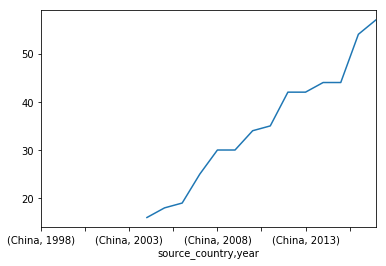

In [16]:
dataset_df.src_qoe_top500.plot()

In [17]:
table_full_name = '{}.{}'.format('datasets_for_modelling', 'students_by_year_countrly_transformed')
dataset_df.to_gbq(table_full_name, credentials.project_id, credentials=credentials, if_exists='replace')

1it [00:06,  6.54s/it]


In [18]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, (China, 1998) to (China, 2017)
Data columns (total 79 columns):
src_population                    20 non-null int64
src_qoe_top20                     14 non-null float64
src_qoe_top100                    14 non-null float64
src_qoe_top200                    14 non-null float64
src_qoe_top500                    14 non-null float64
src_gni                           20 non-null float64
src_gdp                           20 non-null float64
src_rate_of_one_usd               20 non-null float64
src_tertiary_enrolment            20 non-null float64
dst_distance_aus                  20 non-null float64
dst_distance_can                  19 non-null float64
dst_distance_nz                   20 non-null float64
dst_distance_uk                   19 non-null float64
dst_distance_us                   19 non-null float64
dst_students_count_aus            20 non-null float64
dst_students_count_can            19 non-null float64
dst_students